In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  

#scikit-learn.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder 

In [3]:
df_cluster = pd.read_csv('C:\\Users\\Pushkar\\OneDrive - The University of Kansas\\Test_DS_col\\mergedData.csv')

In [4]:
# divided the TempGlobal i.e. the continuous data into 3 bins and created a new column i.e. TempGlobal_bins
df_cluster_disct = df_cluster.copy(deep=True)
df_cluster_disct['TempGlobal_bins']=pd.cut(df_cluster_disct['TempGlobal'], 3,labels=["Low", "Medium", "High"])

In [5]:
df_cluster_disct.head(5)

,year,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal,TempLand,TempGlobal_bins
0,1900,-130.1,5727.78236,180.5557,63.88894,1880.29881,15.143917,8.501583,Low
1,1901,-130.5,5727.78236,180.5557,63.88894,1942.99709,15.073333,8.541917,Low
2,1902,-125.9,5727.78236,180.5557,63.88894,1996.90205,14.958333,8.304417,Low
3,1903,-117.9,5727.78236,180.5557,63.88894,2186.94199,14.836583,8.220167,Low
4,1904,-128.2,5727.78236,180.5557,63.88894,2202.66794,14.810417,8.090917,Low


In [6]:
#[(14.775, 15.204] = Low
# (15.204, 15.631] = Medium
# (15.631, 16.059]] = High

pd.cut(df_cluster_disct['TempGlobal'], 3).head()

0    (14.775, 15.204]
1    (14.775, 15.204]
2    (14.775, 15.204]
3    (14.775, 15.204]
4    (14.775, 15.204]
Name: TempGlobal, dtype: category
Categories (3, interval[float64]): [(14.775, 15.204] < (15.204, 15.631] < (15.631, 16.059]]

In [7]:
df_cluster_disct.drop(['year','TempGlobal','TempLand'],axis=1,inplace=True) #dropping the Id column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

In [8]:
df_cluster_disct.head()

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,Low
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,Low
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,Low
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,Low
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,Low


In [9]:
df=df_cluster_disct.copy()

In [10]:
df.head(10)

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,Low
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,Low
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,Low
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,Low
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,Low
5,-133.7,5727.78236,180.5557,63.88894,2358.98058,Low
6,-126.9,5727.78236,180.5557,63.88894,2470.98898,Low
7,-128.3,5727.78236,180.5557,63.88894,2795.31422,Low
8,-130.8,5727.78236,180.5557,63.88894,2685.51149,Low
9,-126.3,5727.78236,180.5557,63.88894,2789.82023,Low


In [11]:
df.index # indices of rows.

RangeIndex(start=0, stop=116, step=1)

In [12]:
df.isnull().any()

SeaLevel             False
Coal                 False
Oil                  False
Gas                  False
CO2-Concentration    False
TempGlobal_bins      False
dtype: bool

In [13]:
for col in df.columns:
    print("Number of values in column " ,col," : ",df[col].count())

Number of values in column  SeaLevel  :  116
Number of values in column  Coal  :  116
Number of values in column  Oil  :  116
Number of values in column  Gas  :  116
Number of values in column  CO2-Concentration  :  116
Number of values in column  TempGlobal_bins  :  116


In [14]:
#VISUALIZING THE DISTRIBUTIION AND RANGE OF FEATURES.

In [15]:
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)

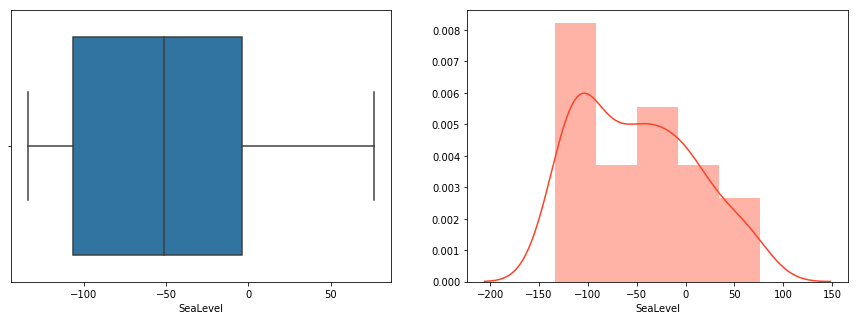

In [16]:
plot('SeaLevel')

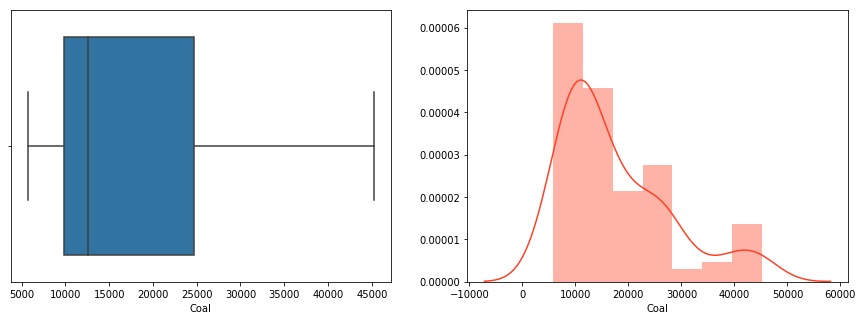

In [17]:
plot('Coal')

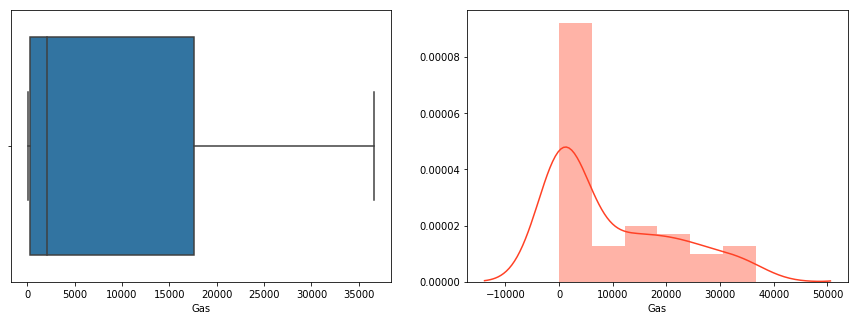

In [18]:
plot('Gas')

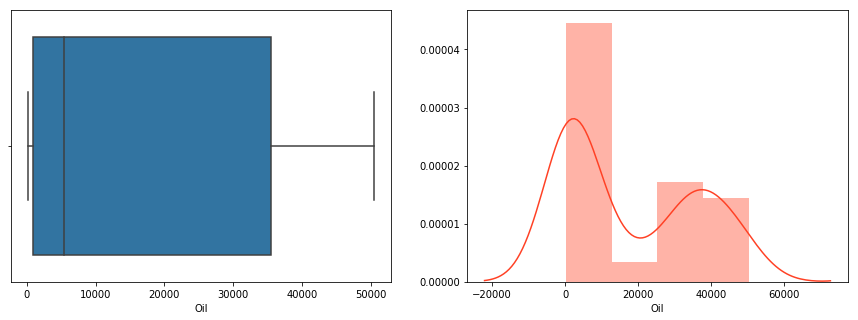

In [19]:
plot('Oil')

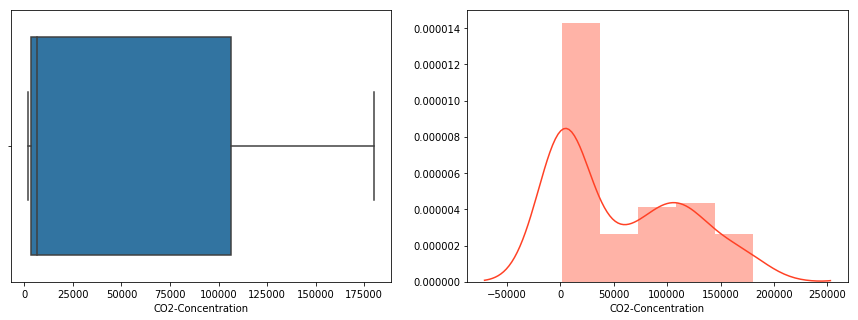

In [20]:
plot('CO2-Concentration')

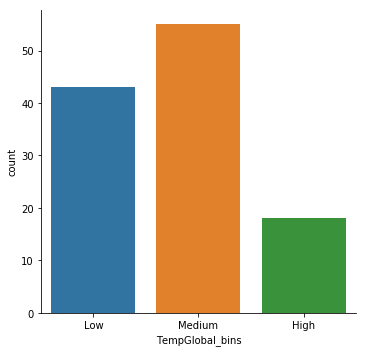

In [22]:
sns.factorplot(data=df,x='TempGlobal_bins',kind='count')

In [23]:
# Preparing the Data

In [24]:
# LABEL ENCODING THE TARGET

In [26]:
#Since the algorithms accept only numeric data we will encode the 'TempGlobal_bins' column using the LabelEncoder() from scikit learn.

In [27]:
le=LabelEncoder()
df['TempGlobal_bins']=le.fit_transform(df['TempGlobal_bins'])

In [28]:
#NORMALIZING FEATURES
#Normalizing the features give better performance.
#Hence I have normalized all the features by scaling them to 0 mean and a unit standard deviation.

In [29]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('TempGlobal_bins',axis=1))
X=scaled_df
Y=df['TempGlobal_bins'].as_matrix()

In [30]:
df.head(10)

,SeaLevel,Coal,Oil,Gas,CO2-Concentration,TempGlobal_bins
0,-130.1,5727.78236,180.5557,63.88894,1880.29881,1
1,-130.5,5727.78236,180.5557,63.88894,1942.99709,1
2,-125.9,5727.78236,180.5557,63.88894,1996.90205,1
3,-117.9,5727.78236,180.5557,63.88894,2186.94199,1
4,-128.2,5727.78236,180.5557,63.88894,2202.66794,1
5,-133.7,5727.78236,180.5557,63.88894,2358.98058,1
6,-126.9,5727.78236,180.5557,63.88894,2470.98898,1
7,-128.3,5727.78236,180.5557,63.88894,2795.31422,1
8,-130.8,5727.78236,180.5557,63.88894,2685.51149,1
9,-126.3,5727.78236,180.5557,63.88894,2789.82023,1


In [31]:
# SPLITTING INTO TRAINING & VALIDATION SETS

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [33]:
# MODELLING

In [34]:
# LOGISTIC REGRESSION

In [35]:
clf_lr=LogisticRegression(C=10)
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.8333333333333334


In [36]:
# kNN

In [37]:
clf_knn=KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
pred=clf_knn.predict(x_test)
print(accuracy_score(pred,y_test))

0.875


In [38]:
# Linear Support Vector Machine(SVM)

In [39]:
clf_svm_lin=LinearSVC()
clf_svm_lin.fit(x_train,y_train)
pred=clf_svm_lin.predict(x_test)
print(accuracy_score(pred,y_test))

0.8333333333333334


In [40]:
#SVM (with 'rbf' kernel

In [41]:
clf_svm=SVC()
clf_svm.fit(x_train,y_train)
pred=clf_svm.predict(x_test)
print(accuracy_score(pred,y_test))

0.7916666666666666


In [42]:
# COMPARING DIFFERENT ALGORITHMS

In [43]:
models=[LogisticRegression(),LinearSVC(),SVC(),KNeighborsClassifier()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}

In [44]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.750000
1,LinearSVM,0.833333
2,rbfSVM,0.791667
3,KNearestNeighbors,0.875000


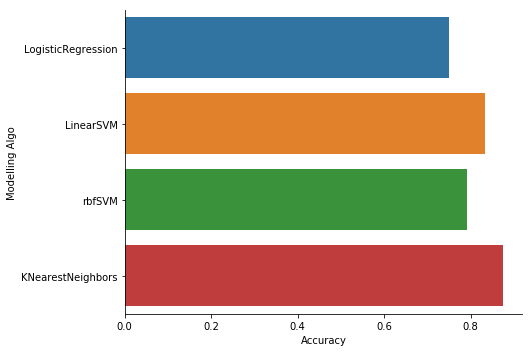

In [45]:
sns.factorplot(data=acc_frame,y='Modelling Algo',x='Accuracy',kind='bar',size=5,aspect=1.5)